In [2]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyodbc
from sqlalchemy import create_engine
import urllib
import pandas as pd

In [5]:
params = urllib.parse.quote_plus("DRIVER={SQL Server};\
                                 SERVER=greystone.database.windows.net;\
                                 DATABASE=AdventureWorks2016;\
                                 UID=sa2;\
                                 PWD=Pa$$w0rd")

conn_str = 'mssql+pyodbc:///?odbc_connect={}'.format(params)
conn = create_engine(conn_str,echo=True)

conn.connect()

2025-05-29 09:14:05,123 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)
2025-05-29 09:14:05,125 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-29 09:14:05,182 INFO sqlalchemy.engine.Engine SELECT schema_name()
2025-05-29 09:14:05,183 INFO sqlalchemy.engine.Engine [generated in 0.00127s] ()
2025-05-29 09:14:05,351 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))
2025-05-29 09:14:05,352 INFO sqlalchemy.engine.Engine [generated in 0.00116s] ()
2025-05-29 09:14:05,410 INFO sqlalchemy.engine.Engine SELECT 1 FROM fn_listextendedproperty(default, default, default, default, default, default, default)
2025-05-29 09:14:05,411 INFO sqlalchemy.engine.Engine [generated in 0.00131s] ()


In [6]:
import pandas as pd
query='''
        select businessentityid,
            Firstname,
            Lastname
        from person.person '''
 
ppl_names = pd.read_sql_query(query, conn)
ppl_names

2025-05-29 09:14:08,201 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-29 09:14:08,203 INFO sqlalchemy.engine.Engine 
        select businessentityid,
            Firstname,
            Lastname
        from person.person 
2025-05-29 09:14:08,204 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-29 09:14:08,843 INFO sqlalchemy.engine.Engine ROLLBACK


,businessentityid,Firstname,Lastname
0,285,Syed,Abbas
1,293,Catherine,Abel
2,295,Kim,Abercrombie
3,2170,Kim,Abercrombie
4,38,Kim,Abercrombie
...,...,...,...
19967,2087,Patricia,Zubaty
19968,2088,Judy,Zugelder
19969,12079,Jake,Zukowski
19970,64,Michael,Zwilling


In [7]:
ppl_names["Firstname"].value_counts()

Firstname
Richard         103
Katherine        99
James            97
Marcus           97
Jennifer         96
               ... 
Gracia            1
Marcel            1
Michael John      1
Shirleen          1
Billie Jo         1
Name: count, Length: 1018, dtype: int64

In [8]:
#13
ppl_names["Firstname"].value_counts().head(10)

Firstname
Richard      103
Katherine     99
James         97
Marcus        97
Jennifer      96
Dalton        93
Lucas         93
Alexandra     93
Isabella      92
Morgan        92
Name: count, dtype: int64

In [9]:
query='''
        select  d.SalesOrderID,
            h.OrderDate,
            DATEPART(WEEKDAY, h.OrderDate) as OrderWeekday,
            d.ProductID,
            d.OrderQty,
            d.LineTotal,
            p.ProductSubcategoryID,
            p.Color
    from Sales.SalesOrderDetail d
        join Sales.SalesOrderHeader h
            on h.SalesOrderID = d.SalesOrderID
        join Production.Product p
            on p.ProductID = d.ProductID
    where YEAR(OrderDate) = 2013 '''
 
sales = pd.read_sql_query(query, conn)
sales

2025-05-29 09:14:27,469 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-29 09:14:27,471 INFO sqlalchemy.engine.Engine 
        select  d.SalesOrderID,
            h.OrderDate,
            DATEPART(WEEKDAY, h.OrderDate) as OrderWeekday,
            d.ProductID,
            d.OrderQty,
            d.LineTotal,
            p.ProductSubcategoryID,
            p.Color
    from Sales.SalesOrderDetail d
        join Sales.SalesOrderHeader h
            on h.SalesOrderID = d.SalesOrderID
        join Production.Product p
            on p.ProductID = d.ProductID
    where YEAR(OrderDate) = 2013 
2025-05-29 09:14:27,472 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-29 09:14:28,836 INFO sqlalchemy.engine.Engine ROLLBACK


,SalesOrderID,OrderDate,OrderWeekday,ProductID,OrderQty,LineTotal,ProductSubcategoryID,Color
0,49181,2013-01-01,3,794,1,2181.5625,2,Black
1,49182,2013-01-01,3,790,1,2443.3500,2,Red
2,49183,2013-01-01,3,791,1,2443.3500,2,Red
3,49184,2013-01-01,3,784,1,2049.0982,1,Black
4,49185,2013-01-01,3,784,1,2049.0982,1,Black
...,...,...,...,...,...,...,...,...
56568,63360,2013-12-31,3,998,1,539.9900,2,Black
56569,63360,2013-12-31,3,872,1,8.9900,28,None
56570,63361,2013-12-31,3,955,1,2384.0700,3,Yellow
56571,63362,2013-12-31,3,966,1,2384.0700,3,Blue


In [10]:
#17
sales.groupby("Color").agg({"SalesOrderID":"count",
                            "OrderQty":"sum",
                            "LineTotal":"sum"})

,SalesOrderID,OrderQty,LineTotal
Color,,,
Black,12943,35134,1.503120e+07
Blue,4947,14214,5.911774e+06
Multi,3607,10721,2.669376e+05
Red,3208,7455,3.673030e+06
Silver,5379,13309,7.608886e+06
Silver/Black,1057,2774,1.041839e+05
White,738,2724,1.540439e+04
Yellow,7083,19536,1.042352e+07


In [11]:
#18
sales.groupby("Color").agg({"SalesOrderID":"count",
                            "OrderQty":"sum",
                            "LineTotal":"sum"}).sort_values("LineTotal",ascending=False)

,SalesOrderID,OrderQty,LineTotal
Color,,,
Black,12943,35134,1.503120e+07
Yellow,7083,19536,1.042352e+07
Silver,5379,13309,7.608886e+06
Blue,4947,14214,5.911774e+06
Red,3208,7455,3.673030e+06
Multi,3607,10721,2.669376e+05
Silver/Black,1057,2774,1.041839e+05
White,738,2724,1.540439e+04


In [12]:
#18
sales.groupby("Color").agg({"SalesOrderID":"count",
                            "OrderQty":"sum",
                            "LineTotal":"sum"}).sort_values("LineTotal",ascending=False)

,SalesOrderID,OrderQty,LineTotal
Color,,,
Black,12943,35134,1.503120e+07
Yellow,7083,19536,1.042352e+07
Silver,5379,13309,7.608886e+06
Blue,4947,14214,5.911774e+06
Red,3208,7455,3.673030e+06
Multi,3607,10721,2.669376e+05
Silver/Black,1057,2774,1.041839e+05
White,738,2724,1.540439e+04


In [13]:
sales.pivot_table(index="ProductSubcategoryID",
                  columns="Color",
                  values="OrderQty",
                  aggfunc="sum",
                  margins=True)

Color,Black,Blue,Multi,Red,Silver,Silver/Black,White,Yellow,All
ProductSubcategoryID,,,,,,,,,
1,5856.0,NaN,NaN,NaN,5878.0,NaN,NaN,NaN,11734
2,6963.0,NaN,NaN,3349.0,NaN,NaN,NaN,6386.0,16698
3,NaN,5362.0,NaN,NaN,NaN,NaN,NaN,3954.0,9316
6,NaN,NaN,NaN,NaN,767.0,NaN,NaN,NaN,767
7,NaN,NaN,NaN,NaN,533.0,NaN,NaN,NaN,533
8,768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,768
9,NaN,NaN,NaN,NaN,804.0,NaN,NaN,NaN,804
12,2451.0,NaN,NaN,NaN,3525.0,NaN,NaN,NaN,5976
13,NaN,NaN,NaN,NaN,NaN,2774.0,NaN,NaN,2774


In [14]:
conn.dispose()

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
sales.to_csv("mysales.csv",index=False)
sales.to_excel("mysales.xlsx",index=False)

NameError: name 'sales' is not defined

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows

In [8]:
#23
df = sns.load_dataset("taxis")
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [9]:
wb = openpyxl.Workbook() #create new workbook
ws = wb.active           #set ws to the active worksheet 

In [10]:
#28
ws.title = "Backup full data"

In [11]:
#29
#append Headers
headers = tuple(df.keys())
ws.append(headers)

#find out how many rows 
number_of_rows = df.shape[0]

#for each row append to ws
for row in range(number_of_rows):
    ws.append(tuple(df.iloc[row]))

In [12]:
#change tab color to black
ws.sheet_properties.tabColor = "000000"

In [13]:
#31
ws.protection.sheet = True
ws.protection.password = "1234"

In [14]:
#32
new_ws = wb.create_sheet("Pickup dist chart")

In [15]:
#33
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [16]:
piv = df.pivot_table(index="pickup_borough",
               columns="color",
               values="pickup",
               aggfunc="count")
piv

color,green,yellow
pickup_borough,,
Bronx,83,16
Brooklyn,313,70
Manhattan,294,4974
Queens,288,369


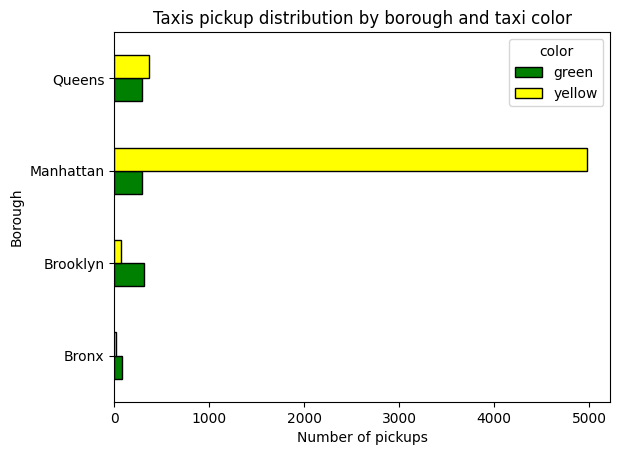

In [17]:
plot = piv.plot.barh(title="Taxis pickup distribution by borough and taxi color",
              color=["Green","Yellow"], edgecolor="black",
              xlabel="Number of pickups",
              ylabel="Borough")

In [18]:
plot.figure.savefig("taxis_pickup_dist.png")

In [19]:
img = openpyxl.drawing.image.Image("taxis_pickup_dist.png")
new_ws.add_image(img)

In [20]:
new_ws2 = wb.create_sheet("Pickup dist data")

In [21]:
rows = dataframe_to_rows(piv)

for row_index, row_data in enumerate(rows, 1):
    for column_index, value in enumerate(row_data, 1):
        new_ws2.cell(row=row_index, column=column_index, value=value)

In [22]:
wb.save("taxis_data.xlsx")